In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties like correlation of the dataset.

In [2]:
# Code starts here

train = pd.read_csv('E:/GreyAtom/glab proj/Move_to_Melbourne/train.csv')
train.head(10)


,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,124,3,2,995000,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,5905,2,0,1080000,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,5963,3,0,725000,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529
3,3521,4,0,1330000,1,251,8.0,3016,3,2,217,266.0,2003,10,144.87960,6,6380
4,3738,3,0,620000,1,221,12.4,3060,1,2,604,190.0,1970,23,144.96860,2,5070
5,5949,4,1,985000,4,106,7.8,3079,3,2,181,154.0,2016,0,145.03883,0,5549
6,732,2,1,801000,1,106,5.2,3056,2,1,156,87.0,2007,23,144.94980,2,11918
7,6459,2,2,465000,3,196,12.0,3073,1,1,676,61.0,2012,-1,145.02142,2,21650
8,263,4,0,950000,1,150,10.5,3034,3,3,761,281.0,1970,21,144.87140,6,4502
9,5325,3,0,1512000,1,106,5.3,3070,1,0,326,125.0,1905,6,144.99902,2,11364


In [3]:
print("shape of train data is : ", train.shape)

shape of train data is :  (4781, 17)


In [4]:
print("statistical properties of train data is : ")
print(train.describe())

statistical properties of train data is : 
                Id        Rooms         Type         Price       Method  \
count  4781.000000  4781.000000  4781.000000  4.781000e+03  4781.000000   
mean   3432.481908     2.964861     0.540473  1.080936e+06     1.441330   
std    1953.488159     0.957911     0.837337  6.757098e+05     1.141898   
min       0.000000     1.000000     0.000000  1.450000e+05     0.000000   
25%    1757.000000     2.000000     0.000000  6.300000e+05     1.000000   
50%    3434.000000     3.000000     0.000000  9.000000e+05     1.000000   
75%    5126.000000     4.000000     1.000000  1.337000e+06     1.000000   
max    6829.000000     8.000000     2.000000  9.000000e+06     4.000000   

           SellerG     Distance     Postcode     Bathroom          Car  \
count  4781.000000  4781.000000  4781.000000  4781.000000  4781.000000   
mean    131.485254    10.045367  3103.308931     1.587952     1.605522   
std      77.203630     5.871496    87.538064     0.711276  

In [6]:
#Drop ID
train.drop("Id", axis=1, inplace=True)

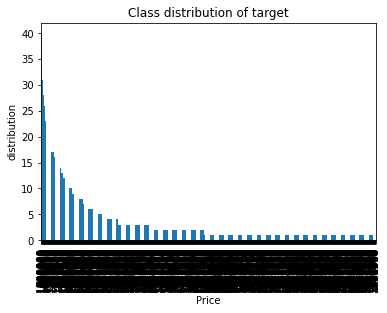

In [9]:
#Checking distribution of target
train['Price'].value_counts().plot(kind='bar')
plt.title('Class distribution of target')
plt.xlabel('Price')
plt.ylabel('distribution')
plt.show()

In [11]:
#Checking for skewness
print("skewness of different features : ")
print(train.skew())

skewness of different features : 
Rooms             0.208722
Type              1.029247
Price             2.429553
Method            1.071776
SellerG           0.129703
Distance          1.674962
Postcode          3.921342
Bathroom          1.328302
Car               1.532654
Landsize         21.066059
BuildingArea      8.885376
YearBuilt        -2.135044
CouncilArea       0.033060
Longtitude       -0.270886
Regionname       -0.498197
Propertycount     1.039731
dtype: float64


In [12]:
#EDA and Data Preprocessing
#Check correlation
corr = train.corr()
print(corr)

                  Rooms      Type     Price    Method   SellerG  Distance  \
Rooms          1.000000 -0.590817  0.523579 -0.053525 -0.029506  0.289699   
Type          -0.590817  1.000000 -0.426876  0.088308  0.026955 -0.242188   
Price          0.523579 -0.426876  1.000000 -0.048165 -0.065393 -0.158197   
Method        -0.053525  0.088308 -0.048165  1.000000 -0.008889 -0.064479   
SellerG       -0.029506  0.026955 -0.065393 -0.008889  1.000000  0.024476   
Distance       0.289699 -0.242188 -0.158197 -0.064479  0.024476  1.000000   
Postcode       0.050753  0.018737  0.120166 -0.034679 -0.001913  0.414110   
Bathroom       0.607276 -0.276890  0.493173 -0.013801 -0.034939  0.114934   
Car            0.420030 -0.278868  0.237160 -0.019285 -0.000271  0.257264   
Landsize       0.092030 -0.043433  0.072753 -0.021601 -0.028470  0.063563   
BuildingArea   0.595395 -0.386768  0.519207 -0.048287 -0.042596  0.145823   
YearBuilt     -0.056373  0.304479 -0.297060  0.021274 -0.000680  0.252163   

## Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different regularization techniques.

In [25]:
# Code starts here

X = train.drop('Price', axis=1)
y = train['Price']

X_train, X_val, y_train, y_val =  train_test_split(X,y,test_size=0.3,random_state=8)

regressor = LinearRegression()

regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_val)
print(y_pred)


[1593599.04230931 1451114.92449009  680518.0049361  ... 1524151.49561468
 1329688.67835453  861311.36999336]


In [26]:
#calculate r2 score
r2 = r2_score(y_val, y_pred)
print("r2 : ",r2)

r2 :  0.6709784755252343


In [27]:
#Predict the price using Lasso regressor
lasso = Lasso()

lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_val)
print(lasso_pred)

[1593562.4411152  1451115.36747584  680529.6090802  ... 1524152.61880603
 1329699.67722631  861308.06182039]


In [28]:
#Calculate r2_score of Lasso model
r2_lasso = r2_score(y_val,lasso_pred)
print("r2_lasso : ", r2_lasso)

r2_lasso :  0.6709781414170166


In [29]:
#Predict the price using Ridge regressor
ridge = Ridge()

ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_val)
print(ridge_pred)

[1580151.84541091 1451622.35484836  685700.86908823 ... 1526082.20261925
 1333322.7696501   860076.26871979]


In [30]:
#Calculate r2_score of ridge model
r2_ridge = r2_score(y_val,ridge_pred)
print("r2_ridge : ", r2_ridge)

r2_ridge :  0.6707652090660217


In [31]:
#predict price using cross-validated estimators

regressor = LinearRegression()

score = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=10)
print(score)

[0.57769766 0.69786557 0.68962943 0.21091495 0.54907255 0.63559724
 0.45884698 0.65518455 0.61303293 0.58507978]


In [32]:
#calculate mean of score
mean_score = np.mean(score)
print(mean_score)

0.56729216383213


In [33]:
#prediction using polynomial regressor
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train, y_train)

y_pred_poly = model.predict(X_val)
print(y_pred_poly)

[2035648.77809143 1806795.85928345  752167.73805237 ... 1341511.90939331
 1173605.11077881  838004.16387939]


In [34]:
#calculate r2 score
r2_poly = r2_score(y_val, y_pred_poly)
print(r2_poly)

0.7272584926853903


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [36]:
# Code starts here

test = pd.read_csv('E:/GreyAtom/glab proj/Move_to_Melbourne/test.csv')

id_ = test['Id']

test.drop('Id',axis=1, inplace=True)

y_pred_test = model.predict(test)

final_submission = pd.DataFrame({'Id':id_,'Price':y_pred_test})

final_submission.to_csv('final_submission.csv', index=False)

# Code ends here.